# <center> Working with Time Series
 <center>Mónika Farsang
 <center>11. 6. 2020

### Importing library

In [1]:
import pandas as pd

### Reading data

In [2]:
# Reading the whole dataset and print the column names
all_data = pd.read_csv('Monika_Farsang_dataset.csv')
all_data.columns

Index(['Year for temperature difference', 'Annual temp difference (°C)',
       'Annual temp difference smooth (°C)', 'Year.Month for CO2', 'CO2 (ppm)',
       'Year for Arctic sea ice extent',
       'Arctic sea ice extent (million square km)', 'Person ID number',
       'Gender', 'Daily fruit/veggies', 'Daily stress (0-5)',
       'Number of close friends', 'Number of social interactions per day',
       'Sleeping hours'],
      dtype='object')

### Creating time series DataFrames

In [3]:
# Creating smaller dataframes for the temperature values
# Droping NaN values, creating datetime format and setting it to index
data_temp = all_data[['Year for temperature difference', 'Annual temp difference (°C)',
       'Annual temp difference smooth (°C)']].dropna()
data_temp['Year for temperature difference'] = pd.to_datetime(data_temp['Year for temperature difference'], format='%Y')
data_temp.set_index('Year for temperature difference')

,Annual temp difference (°C),Annual temp difference smooth (°C)
Year for temperature difference,,
1880-01-01,-0.16,-0.09
1881-01-01,-0.08,-0.12
1882-01-01,-0.10,-0.16
1883-01-01,-0.16,-0.19
1884-01-01,-0.28,-0.23
...,...,...
2015-01-01,0.90,0.83
2016-01-01,1.02,0.87
2017-01-01,0.92,0.91


In [4]:
# Creating smaller dataframes for CO2 emission values
# Droping NaN values, creating datetime format and setting it to index
data_CO2 = all_data[['Year.Month for CO2', 'CO2 (ppm)']].dropna()
data_CO2['Year.Month for CO2'] = pd.to_datetime(data_CO2['Year.Month for CO2'], format='%Y.%m.%d')
data_CO2.set_index('Year.Month for CO2')

,CO2 (ppm)
Year.Month for CO2,
1958-03-01,314.62
1958-04-01,315.29
1958-05-01,314.71
1958-06-01,314.85
1958-07-01,314.98
...,...
2019-12-01,412.44
2020-01-01,413.07
2020-02-01,413.26


In [5]:
# Creating smaller dataframes for the ice extent values
# Droping NaN values, creating datetime format and setting it to index
data_ice = all_data[['Year for Arctic sea ice extent', 'Arctic sea ice extent (million square km)']].dropna()
data_ice['Year for Arctic sea ice extent'] = pd.to_datetime(data_ice['Year for Arctic sea ice extent'], format = '%Y')
data_ice.set_index('Year for Arctic sea ice extent')

,Arctic sea ice extent (million square km)
Year for Arctic sea ice extent,
1979-01-01,7.05
1980-01-01,7.67
1981-01-01,7.14
1982-01-01,7.30
1983-01-01,7.39
1984-01-01,6.81
1985-01-01,6.70
1986-01-01,7.41
1987-01-01,7.28


### Importing library for plotting

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns

# Setting the sizes of the figures
sns.set(rc={'figure.figsize':(16, 4)})

### Simple line plot with one variable

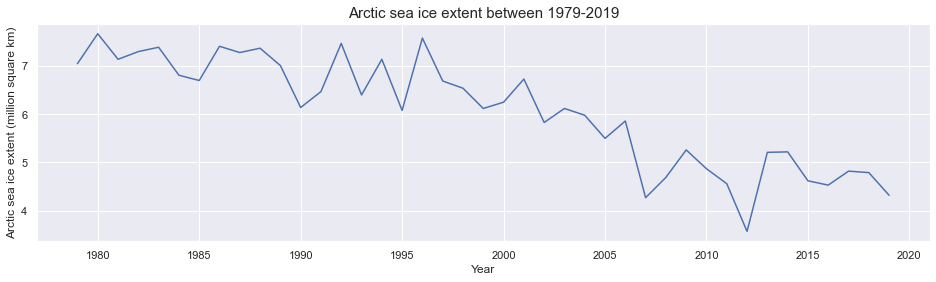

In [7]:
# Plotting the Arctic sea ice extent
x = data_ice['Year for Arctic sea ice extent']
y = data_ice['Arctic sea ice extent (million square km)']
plt.plot(x,y)

plt.xlabel('Year')
plt.ylabel('Arctic sea ice extent (million square km)')
plt.title('Arctic sea ice extent between 1979-2019', fontsize=(15))
plt.show()

### Line plot with moving average

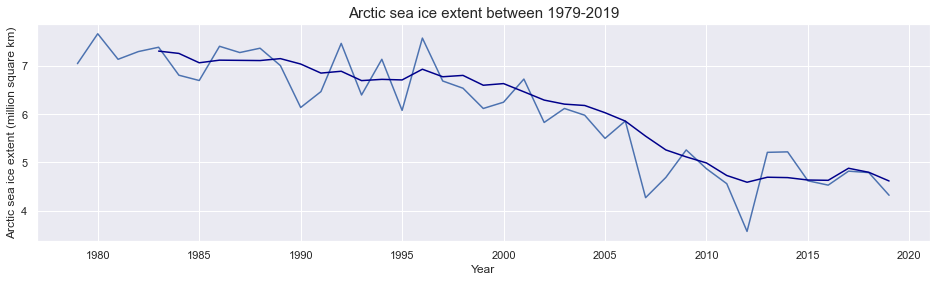

In [8]:
# Plotting the Arctic sea ice extent with moving average
x = data_ice['Year for Arctic sea ice extent']
y = data_ice['Arctic sea ice extent (million square km)']

# Applying the moving average
moving_avg = y.rolling(5).mean()

plt.plot(x,y)
plt.plot(x, moving_avg, color = 'darkblue')

plt.xlabel('Year')
plt.ylabel('Arctic sea ice extent (million square km)')
plt.title('Arctic sea ice extent between 1979-2019', fontsize=(15))
plt.show()

### Plot with two variables and running mean

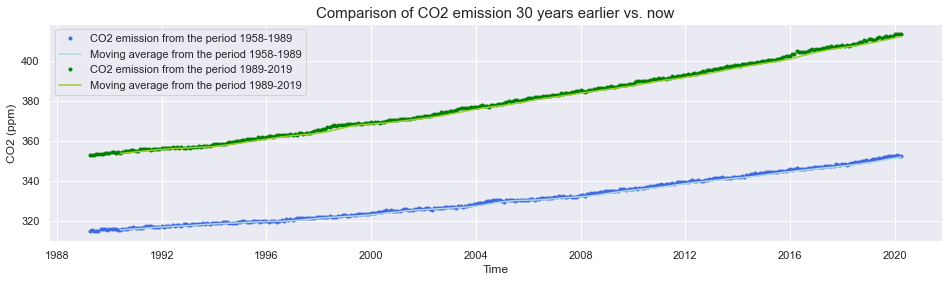

In [9]:
# Plotting the CO2 emission splitted into two parts
half = int(len(data_CO2)/2)
data_CO2_first = data_CO2[:half]
data_CO2_second = data_CO2[half:]

moving_average_first = data_CO2_first['CO2 (ppm)'].rolling(15).mean()
moving_average_second = data_CO2_second['CO2 (ppm)'].rolling(15).mean()

fig, ax = plt.subplots()

# First half
# Using the years from the second half in order to get a good comparison
ax.plot(data_CO2_second['Year.Month for CO2'], data_CO2_first['CO2 (ppm)'], marker='.', markersize=6, color='royalblue',linestyle='None', label='CO2 emission from the period 1958-1989')
ax.plot(data_CO2_second['Year.Month for CO2'], moving_average_first, linewidth=1.5, color='lightblue', label='Moving average from the period 1958-1989')

# Second half
ax.plot(data_CO2_second['Year.Month for CO2'], data_CO2_second['CO2 (ppm)'], marker='.', markersize=6, color='green', linestyle='None', label='CO2 emission from the period 1989-2019')
ax.plot(data_CO2_second['Year.Month for CO2'], moving_average_second, linewidth=1.5, color='yellowgreen', label='Moving average from the period 1989-2019')

ax.legend()
ax.set_xlabel('Time')
ax.set_ylabel('CO2 (ppm)')
ax.set_title('Comparison of CO2 emission 30 years earlier vs. now', fontsize=(15))
plt.show()

### Plot with filled areas (positive and negative changings)

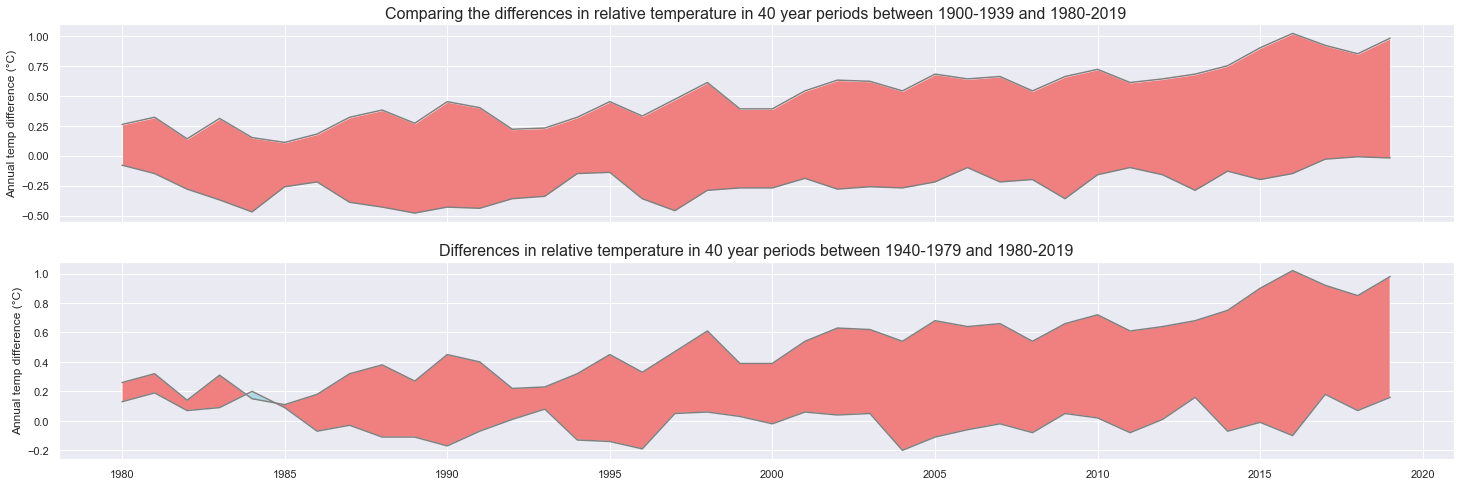

In [10]:
# Plotting the relative temperature changes splitted into three time periods
data_temp_first = data_temp[20:60]
data_temp_second = data_temp[60:100]
data_temp_third = data_temp[100:140]

# Creating plots relative to the time period 1980-2019 for comparison purposes
x = data_temp_third['Year for temperature difference']
y1 = data_temp_first['Annual temp difference (°C)']
y1.reset_index(drop=True, inplace=True)
y2 = data_temp_second['Annual temp difference (°C)']
y2.reset_index(drop=True, inplace=True)
y3 = data_temp_third['Annual temp difference (°C)']
y3.reset_index(drop=True, inplace=True)

fig, (ax, ax1) = plt.subplots(2, 1, sharex=True, figsize=(25,8))

# First plot
ax.plot(x, y1, x, y3, color='grey')
ax.fill_between(x, y1, y3, where=y3 >= y1, facecolor='lightcoral', interpolate=True)
ax.fill_between(x, y1, y3, where=y3 <= y1, facecolor='lightblue', interpolate=True)
ax.set_title('Comparing the differences in relative temperature in 40 year periods between 1900-1939 and 1980-2019', fontsize=(16))
ax.set_ylabel('Annual temp difference (°C)')

# Second plot
ax1.plot(x, y2, x, y3, color='grey')
ax1.fill_between(x, y2, y3, where=y3 >= y2, facecolor='lightcoral', interpolate=True)
ax1.fill_between(x, y2, y3, where=y3 <= y2, facecolor='lightblue', interpolate=True)
ax1.set_title('Differences in relative temperature in 40 year periods between 1940-1979 and 1980-2019', fontsize=(16))
ax1.set_ylabel('Annual temp difference (°C)')
plt.show()